<a href="https://colab.research.google.com/github/JisbethDiaz/FCFM_Miner-a_de_Datos/blob/Miner%C3%ADa-de-datos/PIA_Equipo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PIA ANÁLISIS DE DATOS**

* Equipo #4
* Grupo: 02, Frecuencia de clase: Miércoles
* Integrantes:

  * 1857602 Díaz Vázquez Jisbeth Jaquelin.
  * 1842201 Ramiro Mayorga Julio César.
  * 1854552 Requenes Villarreal Linda Karina.
  * 1941443 Martínez Valdez Norma Isabel.


# **Severely Injured Workers**
URL: https://www.kaggle.com/jboysen/injured-workers



## *Descripción de la base de datos*

Desde el 1 de enero de 2015, la Administración de Seguridad y Salud Ocupacional (OSHA) exige a los empleadores que informen de todas las lesiones graves relacionadas con el trabajo que fueron ocurridas hasta el 28 de febrero de 2017 y fueron definidas (utilizando el Sistema de Clasificación de Lesiones y Enfermedades Profesionales) como amputación, hospitalización o pérdida de un ojo.

1. Tamaño de la base:

  Los datos se muestran en una tabla de dimensiones de 26 columnas x 21578 filas, donde la cantidad de columnas representa el incidente, las partes implicadas, el empleador, la lesión sufrida y el resultado final, y las filas abarcan el número total de incidentes en dicho periodo.

2. Columnas:

  * Address: Dirección (texto largo)
  * City: Ciudad (cadena)
  * State: Estado (cadena)
  * Latitude: Latitud (float)
  * Longitude: Longitud (float)
  * Primary NAICS: Línea de negocio principal de una empresa (entero)
  * Hospitalized: Hospitalizado (entero)
  * Amputation: Amputación (entero)
  * Inspection: Inspección (entero)
  * Final Narrative: Narración final (texto largo)
  * Nature: Naturaleza (cadena)
  * Part of Body: Parte del cuerpo (cadena)
  * Event: Evento (cadena)
  * Source: Procedencia (cadena)
  * Secondary Source: Segunda procedencia (cadena)

## *Justificación del uso de datos*

  Los accidentes de trabajo pueden ocurrir en cualquier momento, saber qué hacer y cómo actuar es fundamental para asegurar una oportuna atención al lesionado. Por esta razón, una aseguradora consideró importante tener un buen historial para poder informarse y realizar un análisis acerca del número de frecuencias de cada tipo de emergencia relacionada con su puesto, así como también su respectiva siniestralidad. Ya que con ello, es posible calcular pólizas de seguros contra accidentes laborales para los trabajadores de empresas establecidas.


##*Objetivos*

*   Principal:

  Predecir el comportamiento de frecuencia de lesiones en cada uno de los estados definiendo el grado de urgencia más común.

*   Secundario:

  Calcular el índice de siniestralidad anual de cada uno de los puestos laborales para la actualización de los diferentes tipos de pólizas.

##*Preguntas*

*   ¿Qué industrias tienen la tasa más alta de lesiones laborales?
*   ¿Las lesiones más graves?
*   ¿Puede predecir las lesiones para 2016 basándose en datos de 2015?
*   ¿En qué regiones son más frecuentes las lesiones?

# **Limpieza de datos**


In [ ]:
import pandas as pd
import numpy as np
import json
df = pd.read_csv('severeinjury.csv', encoding= 'unicode_escape') #https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

Las dimensiones de nuestra Base de datos 26 columnas y 21578 filas

In [ ]:
df.shape

(21578, 26)

##*Datos sin manipulación*

Las primeras y ultimas 5 Filas de datos de nuestra base de datos

In [ ]:
df.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


In [ ]:
df.tail()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
21573,2017021908,1187496,2/28/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1.0,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,2/28/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1.0,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,2/28/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1.0,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,2/28/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1.0,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN
21577,2017021912,1187132,2/28/2017,"JV MANUFACTURING, INC.",701 Butterfield Coach Road,NaN,SPRINGDALE,ARKANSAS,72765.0,36.17,-94.09,333319,1.0,0.0,NaN,An employee was cutting the strapping on a bun...,111,Fractures,510,"Leg(s), unspecified",6239,"Struck by falling object or equipment, n.e.c.",2131,"Bundles, bales",NaN,NaN


Los nombres de las columnas y sus tipos de datos

In [ ]:
df.columns

Index(['ID', 'UPA', 'EventDate', 'Employer', 'Address1', 'Address2', 'City',
       'State', 'Zip', 'Latitude', 'Longitude', 'Primary NAICS',
       'Hospitalized', 'Amputation', 'Inspection', 'Final Narrative', 'Nature',
       'NatureTitle', 'Part of Body', 'Part of Body Title', 'Event',
       'EventTitle', 'Source', 'SourceTitle', 'Secondary Source',
       'Secondary Source Title'],
      dtype='object')

In [ ]:
df.dtypes


ID                          int64
UPA                         int64
EventDate                  object
Employer                   object
Address1                   object
Address2                   object
City                       object
State                      object
Zip                       float64
Latitude                  float64
Longitude                 float64
Primary NAICS              object
Hospitalized              float64
Amputation                float64
Inspection                float64
Final Narrative            object
Nature                      int64
NatureTitle                object
Part of Body                int64
Part of Body Title         object
Event                       int64
EventTitle                 object
Source                      int64
SourceTitle                object
Secondary Source          float64
Secondary Source Title     object
dtype: object

##*Modificación de columnas*

Cambiaremos el nombre a las columnas con espacios en ellas 

In [ ]:
df.rename(columns = {'Primary NAICS':'Primary_NAICS'})

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary_NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,2/28/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1.0,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,2/28/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1.0,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,2/28/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1.0,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,2/28/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1.0,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN


In [ ]:
df.rename(columns = {'Final Narrative':'Final_Narrative'})

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final_Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,2/28/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1.0,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,2/28/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1.0,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,2/28/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1.0,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,2/28/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1.0,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN


In [ ]:
df.rename(columns = {'Part of Body':'Part_of_Body'})
df.rename(columns = {'Secondary Source':'Secondary_Source'})
df.rename(columns = {'Part of Body Title':'Part_of_Body_Title'})
df.rename(columns = {'Secondary Source Title':'Secondary_Source_Title'})

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary_Source_Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,2/28/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1.0,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,2/28/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1.0,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,2/28/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1.0,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,2/28/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1.0,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN


Clasificando los datos por las categorias de la columna State


In [ ]:
df.State.unique()

array(['NEW YORK', 'WISCONSIN', 'PENNSYLVANIA', 'GEORGIA', 'FLORIDA',
       'COLORADO', 'OKLAHOMA', 'TEXAS', 'LOUISIANA', 'MISSISSIPPI',
       'NEW JERSEY', 'OHIO', 'ILLINOIS', 'NEBRASKA', 'NEW HAMPSHIRE',
       'KANSAS', 'MASSACHUSETTS', 'ARKANSAS', 'MICHIGAN', 'IDAHO',
       'MISSOURI', 'MAINE', 'CONNECTICUT', 'WEST VIRGINIA',
       'NORTH DAKOTA', 'MONTANA', 'NORTH CAROLINA', 'DELAWARE',
       'CALIFORNIA', 'AMERICAN SAMOA', 'DISTRICT OF COLUMBIA', 'ALABAMA',
       'TENNESSEE', 'OREGON', 'SOUTH DAKOTA', 'RHODE ISLAND', 'INDIANA',
       'VIRGINIA', 'NEW MEXICO', 'MARYLAND', 'UTAH', 'VERMONT', 'ARIZONA',
       'GUAM', 'IOWA', 'KENTUCKY', 'MINNESOTA', 'WASHINGTON',
       'SOUTH CAROLINA', 'HAWAII', 'PUERTO RICO', 'VIRGIN ISLANDS',
       'NEVADA', 'WYOMING', 'NORTHERN MARIANA ISLANDS', 'ALASKA'],
      dtype=object)

In [ ]:
NY = df[df['State']=='NEW YORK']

NY.to_csv('Solo_NEW YORK.csv', index=False)
w = df[df['State']=='WASHINGTON']
w.to_csv('Solo_WASHINGTON.csv', index=False)

Filtrando datos de la columna Nature por State



In [ ]:
NY_f = df.loc[df.State == 'NEW YORK'].Nature
NY_f

0         111
47        111
49         10
53       1510
63       1311
         ... 
21514     111
21521    1530
21522     111
21542    1311
21567    1311
Name: Nature, Length: 1069, dtype: int64

In [ ]:
W_f = df.loc[df.State == 'WASHINGTON'].Nature
W_f

1450     1831
2153      111
2797      111
3339     1311
3795     2731
4027      194
4149      134
6566      111
6944     1972
9009     1311
9037      111
9149      111
9241      111
10156     111
10197     111
11605     160
12149     111
12555    1311
12735     111
12868     111
13377     111
14777     193
15770    1972
15778     111
16522     111
16564     111
16800      10
16954     143
16979     143
17104    1311
17610     111
17721     111
18506     111
19191     111
19462    1973
19547     111
19708      10
20668     160
20981     111
Name: Nature, dtype: int64

##*Manipulación de datos nulos*

Veremos los Datos Nulos y tomaremos acciones al respecto

In [ ]:
df.isnull()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
21574,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
21575,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
21576,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:

df.isnull().any()

ID                        False
UPA                       False
EventDate                 False
Employer                  False
Address1                   True
Address2                   True
City                       True
State                     False
Zip                        True
Latitude                   True
Longitude                  True
Primary NAICS              True
Hospitalized              False
Amputation                 True
Inspection                 True
Final Narrative           False
Nature                    False
NatureTitle               False
Part of Body              False
Part of Body Title        False
Event                     False
EventTitle                False
Source                    False
SourceTitle               False
Secondary Source           True
Secondary Source Title     True
dtype: bool

In [ ]:
df.isnull().sum()

ID                            0
UPA                           0
EventDate                     0
Employer                      0
Address1                     10
Address2                  19717
City                          9
State                         0
Zip                          11
Latitude                     91
Longitude                    91
Primary NAICS                 2
Hospitalized                  0
Amputation                    2
Inspection                13756
Final Narrative               0
Nature                        0
NatureTitle                   0
Part of Body                  0
Part of Body Title            0
Event                         0
EventTitle                    0
Source                        0
SourceTitle                   0
Secondary Source          15766
Secondary Source Title    15766
dtype: int64

Para limpiar los datos nulos hay que trabajarlos en un data frame diferente

In [ ]:
data_frame_0 = df.fillna(0) #Con esto llenamos todas las celdas con datos nulos con un 0
data_frame_0.to_csv('data_frame_0.csv', index=False)
data_frame_0

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,0,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,0,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",0.0,0
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,0,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,0.0,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,0,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,0,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,2/28/2017,JPN Masonry LLC,806 Channing Place,0,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1.0,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",0.0,0
21574,2017021909,1187261,2/28/2017,CR MEYER,1815 Marathon Ave.,0,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1.0,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",0.0,0
21575,2017021910,1187351,2/28/2017,PHOENIX HOME CARE,353 River Bluff Drive,0,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1.0,0.0,0.0,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",0.0,0
21576,2017021911,1187282,2/28/2017,"Cross Insulation, Inc.",West Fargo New Construction,0,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1.0,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,0.0,0


In [ ]:
df_drop = df.dropna() # Y con esta instrucción borramos las filas que contienen datos nulos
df_drop.to_csv('df_drop.csv', index=False)

##*Nuevo archivo con la base de datos editada*

In [ ]:
df_drop_column = df.dropna(axis=1)#Para finalizar, con esta instrucción eliminamos las columnas con datos nulos
df_drop_column.to_csv('df_drop_column.csv', index=False)

# **Estadística básica de los datos**

In [ ]:
#Identificando correlación de las columnas
correlacion=df.corr()

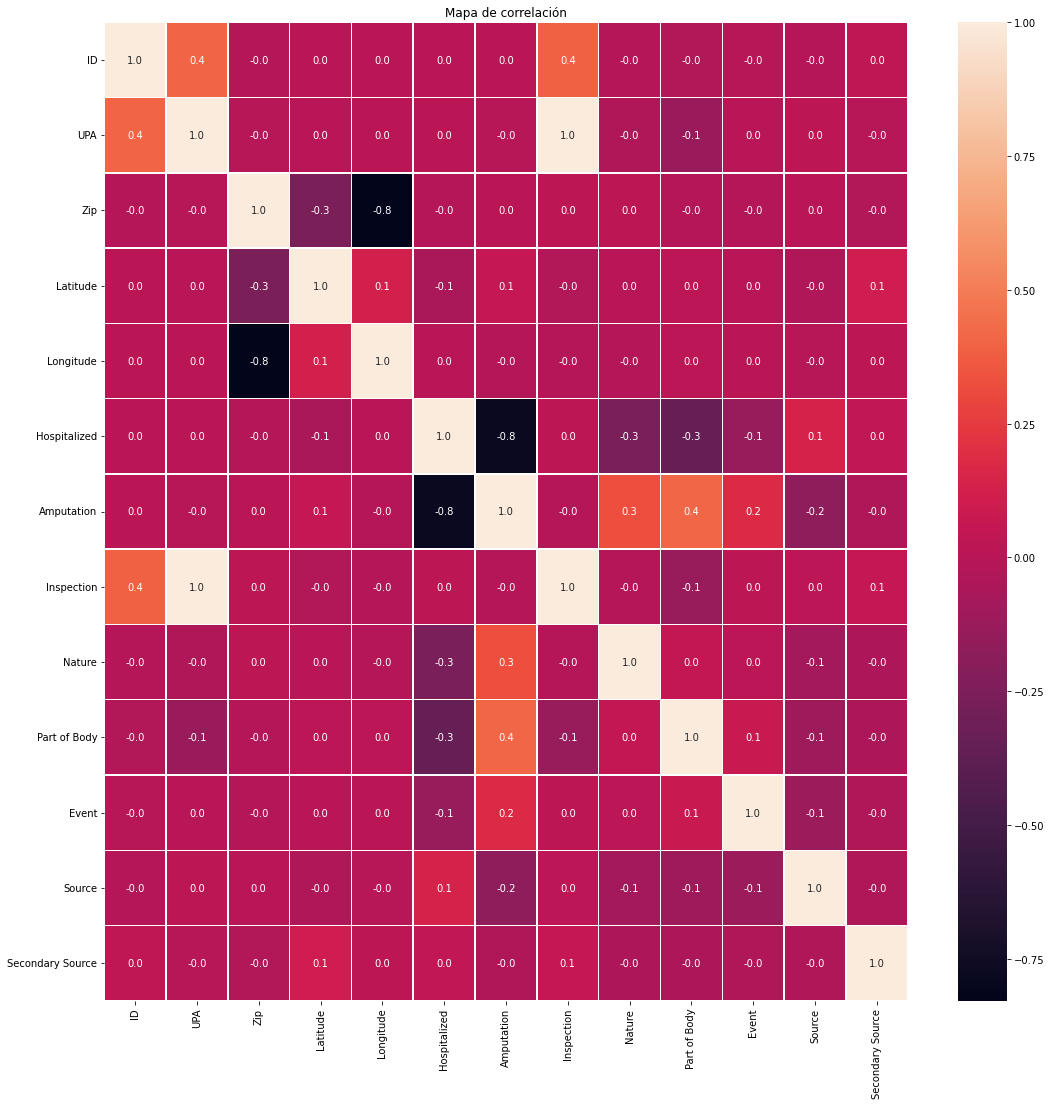

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Para fines de análisis, nos enfocaremos en si el paciente fue hospitalizado o no para saber la gravedad del accidente; por lo que identifiicamos que, debido a la baja correlación que tienen algunas columnas pueden ser eliminadas sin problema.

In [ ]:
datos= data_frame_0.drop(['ID', 'UPA', 'Zip', 'Latitude', 'Longitude', 'Address1', 'Address2', 'City', 'Primary NAICS', 'Secondary Source',	'Secondary Source Title'], axis=1)


In [ ]:
datos.shape

(21578, 15)

In [ ]:
datos[['Hospitalized', 'Amputation']].describe()

,Hospitalized,Amputation
count,21578.000000,21578.000000
mean,0.807999,0.269812
std,0.412055,0.451019
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,3.000000,9.000000


In [ ]:
datos['Hospitalized'].value_counts()

1.0    17128
0.0     4298
2.0      149
3.0        3
Name: Hospitalized, dtype: int64

In [ ]:
datos['Amputation'].value_counts()

0.0    15791
1.0     5764
2.0       18
3.0        3
9.0        1
4.0        1
Name: Amputation, dtype: int64

De 21578 pacientes que tuvimos, el 80.08% fue hospitalizado, con un máximo de 3 hospitalzaciones, sin embargo, la mayoría solo requirió una hospitalzación.
Por otro lado, el 26.81% de todos los pacientes requirió por lo menos una amputación, alcanzando un máximo de 9 amputaciones.

In [ ]:
datos['State'].value_counts()

TEXAS                       3481
FLORIDA                     2160
PENNSYLVANIA                1723
OHIO                        1658
ILLINOIS                    1362
GEORGIA                     1156
NEW YORK                    1069
WISCONSIN                    917
ALABAMA                      677
MISSOURI                     675
COLORADO                     642
NEW JERSEY                   561
LOUISIANA                    554
ARKANSAS                     511
MASSACHUSETTS                508
KANSAS                       471
OKLAHOMA                     453
MISSISSIPPI                  449
NEBRASKA                     348
NORTH DAKOTA                 224
WEST VIRGINIA                213
CONNECTICUT                  211
IDAHO                        210
MAINE                        162
SOUTH DAKOTA                 140
NEW HAMPSHIRE                118
CALIFORNIA                   113
MONTANA                      105
VIRGINIA                     101
DELAWARE                      95
RHODE ISLA

In [ ]:
datos[["EventDate", "State", 'Employer']].describe()

,EventDate,State,Employer
count,21578,21578,21578
unique,790,56,18004
top,9/2/2015,TEXAS,U.S. Postal Service
freq,56,3481,129


In [ ]:
(datos['Employer'].value_counts()==1).value_counts()

True     16052
False     1952
Name: Employer, dtype: int64

Además, el día que más accidentes hubo fue el 2 de noviembre del 2015 con una frecuencia de 56 personas, siendo Texas el estado con mayor incidencia de ellos. 
Con la información recabada se sabe a demás que Servicios Postales es el trabajo con más ocurrencia de accidentes teniendo diferencias muy grandes con respecto a otras empresas, pues la mayoría tiene menos de 10 registros, y se sabe que el 74.40% de las empresas solo reportaron un incidente.

#**Gráficas**

En este apartado se analizarán distintos gráficos, los cuales incluirán una breve conclusión de los datos obtenidos.

Text(0, 0.5, 'Frecuencia')

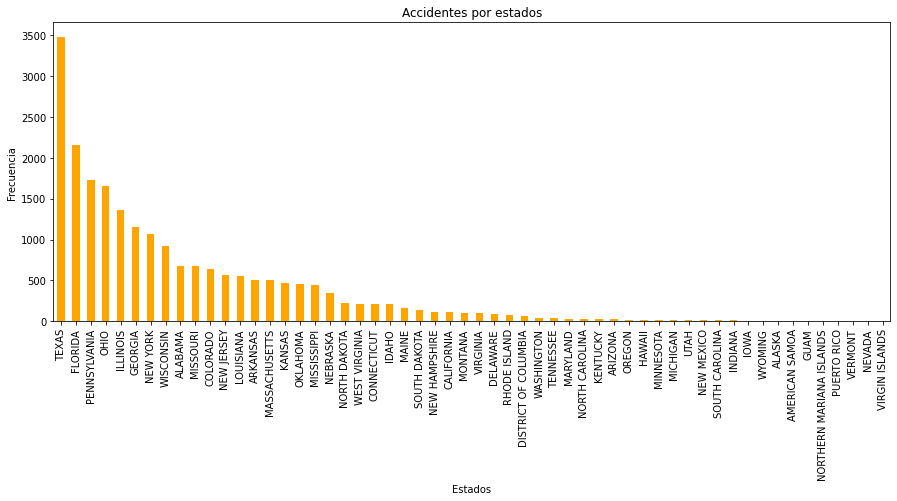

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pylab import *

plt.figure(figsize=(15,5.5))   #(ancho,altura) de la gráfica
datos['State'].value_counts().plot.bar(color='orange')
plt.title('Accidentes por estados')   #Nombre de la gráfica
xlabel('Estados')
ylabel('Frecuencia')

En  la gráfica anterior podemos observar la frecuencia de accidentes por estado. Esto es importante ya que el precio de los seguros de accidentes varía por estado según la frecuencia de lesiones.

Text(0, 0.5, 'Frecuencia')

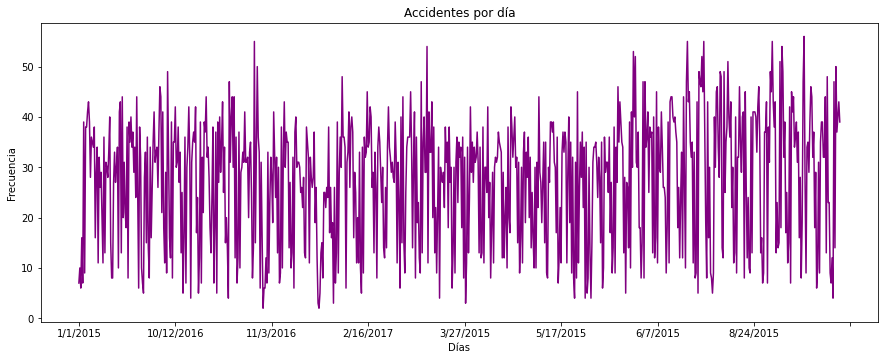

In [ ]:
plt.figure(figsize=(15,5.5))  
datos['EventDate'].value_counts().sort_index().plot.line(color='purple')
plt.title('Accidentes por día')
xlabel('Días')
ylabel('Frecuencia')

Nuestra base de datos acumula eventos desde el 1 de enero de 2015 hasta el 28 de febrero de 2018. En la gráfica se puede apreciar que no tiene tendencia y probablemente una varianza estacionaria.
En nuestro caso, una aseguradora puede tener una idea del número de accidentes que se darán en el futuro. Esto les ayudará a calcular el monto de la reserva tecnica que tienen que tener para solventar los gastos por accidentes.

Text(0, 0.5, 'Frecuencia')

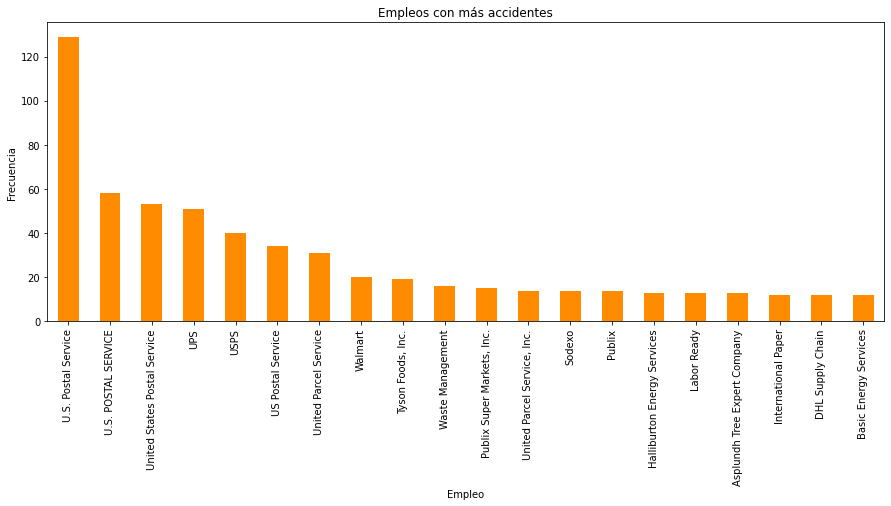

In [ ]:
plt.figure(figsize=(15,5.5))
datos['Employer'].value_counts().head(20).plot.bar(color='darkorange')
plt.title('Empleos con más accidentes')
xlabel('Empleo')
ylabel('Frecuencia')

Es fácil identificar que el empleo con mas accidentes ocurridos son los que tienen como giro el envio de servicios postales, seguido de Walmart, Tyson Foods Inc y Waste Management.

Text(0, 0.5, 'Frecuencia')

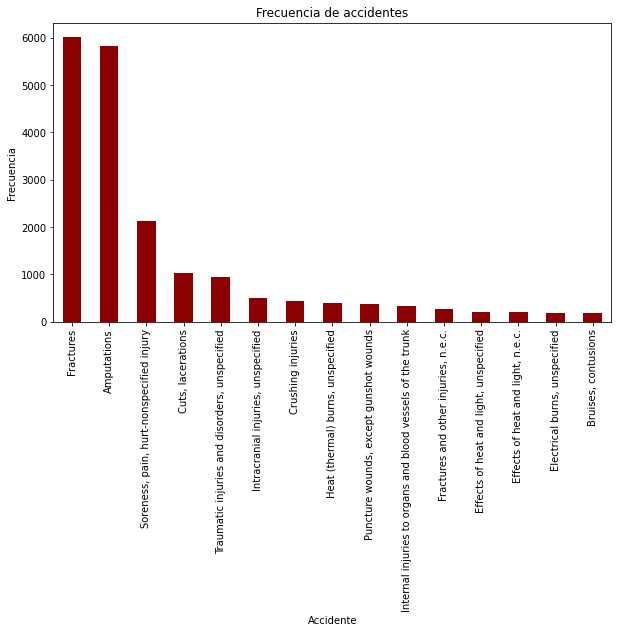

In [ ]:
plt.figure(figsize=(10,5.5))
datos['NatureTitle'].value_counts().head(15).plot.bar(color='darkred')
plt.title('Frecuencia de accidentes')
xlabel('Accidente')
ylabel('Frecuencia')

En esta gráfica se observa el top 10 de los accidentes más frecuentes registrados en Estados Unidos.
Si tomar en cuenta el costo promedio que se tiene al presentar cada accidente, nos ayudará de igual manera en el cálculo de la reserva técnica.

Text(0, 0.5, 'Frecuencia')

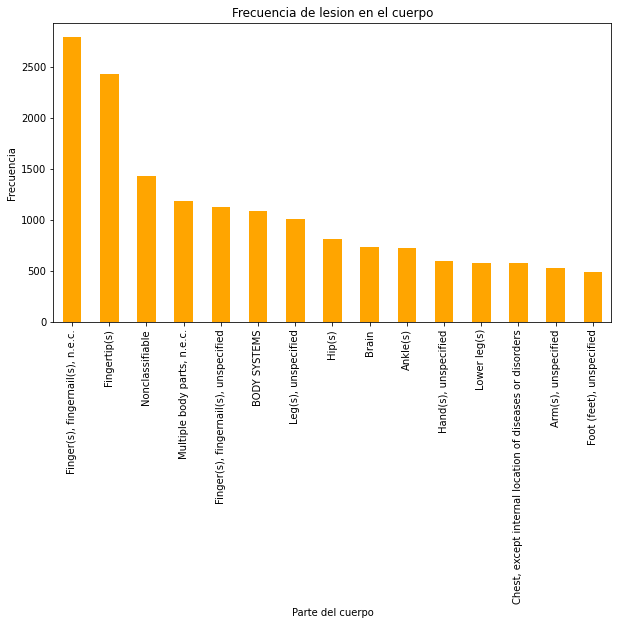

In [ ]:
plt.figure(figsize=(10,5.5))
datos['Part of Body Title'].value_counts().head(15).plot.bar(color='orange')
plt.title('Frecuencia de lesion en el cuerpo')
xlabel('Parte del cuerpo')
ylabel('Frecuencia')

Las manos y dedos son nuestra principal herramienta, por lo que perder alguna de estas, golpearía de forma negatva en nuestra economía. Es importante identificar la frecuencia con que ocurren accidentes en el cuerpo.

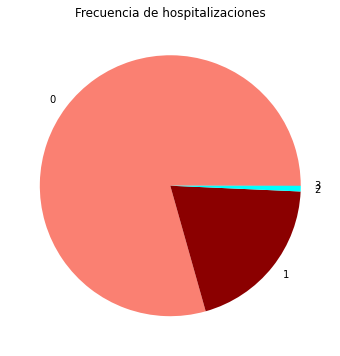

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
frec = [0,1,2,3]
plt.pie(datos['Hospitalized'].value_counts(), labels=frec, colors= ['orange', 'darkred', 'cyan', 'black'])
plt.title('Frecuencia de hospitalizaciones')

plt.show()


Cabe recalcar que la mayoría de los pacientes accidentados fueron hospitalizados por lo menos una vez.

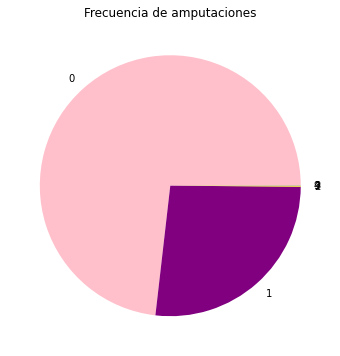

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
frec = [0,1,2,3,9,4]
plt.pie(datos['Amputation'].value_counts(), labels=frec, colors=['pink', 'purple', 'yellow', 'green', 'cyan', 'black'])
plt.title('Frecuencia de amputaciones')

plt.show()


Aún así, menos de la mitad de esos trabajadores necesitaron de alguna amputación.

##*Conclusión*

  Los datos indican que el estado de Texas tiene una mayor frecuencia en lesiones laborales, ya que cuenta con aproximadamente el 16% de los accidentes de trabajo en Estados Unidos.
  Por otro lado, tenemos que el grado de urgencia más común en un lesionado es de fracturas y amputaciones, el cual corresponde al 55% de los accidentes más frecuentes, siendo los dedos el área del cuerpo con mayor ocurrencia de lesión.
  Por último, se distingue que el 74% de los trabajadores que fueron lesionados, contaron con una probabilidad menor al 50% para realizarse el proceso de amputación. Además, se sabe que el empleo con más riesgo de lesión es en Servicios Postales.



# **Método series de tiempo**


Nuestro principal objetivo es predecir la frecuencia de lesiones en cada uno de los estados definiendo el grado de urgencia más común. 
Para ello, es necesario realizar un análisis de la frecuencia de lesiones esperada en los próximos meses:

In [ ]:
%load_ext rpy2.ipython
%load_ext rmagic

/usr/local/lib/python3.7/dist-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


Comenzamos visualizando los datos inicales. Dado a que durente el 2017 algunos días no se registraron, decidimos utilizar solo los datos recabados hasta finales de 2016 para tener una predicción confiable.

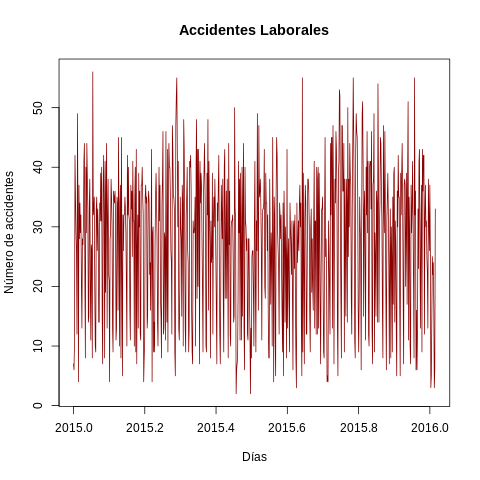

In [ ]:
%%R 
setwd("/content")
 x<-read.csv("SerieDeTiempo_AccidentesLaborales.csv",header=T)
 serie<-ts(x$Accidentes,frequency=721,start=c(2015,1,1),end=c(2016,12,31))
 
 plot(serie,main='Accidentes Laborales',xlab='Días',ylab='Número de accidentes', col='darkred')

##Métricas de evaluación

Como primer paso en el método de series de tiempo, identificamos que nuestra serie sea estacionaria. Esto quiere decir que la media de los datos no tiene tendencia, y su varianza es estacionaria.

Una vez hechas las pruebas, comenzamos con la predicción. Para ello, buscamos un arima que prediga bien los datos (los modelos arima ayudan a la predicción de series estacionarias). 

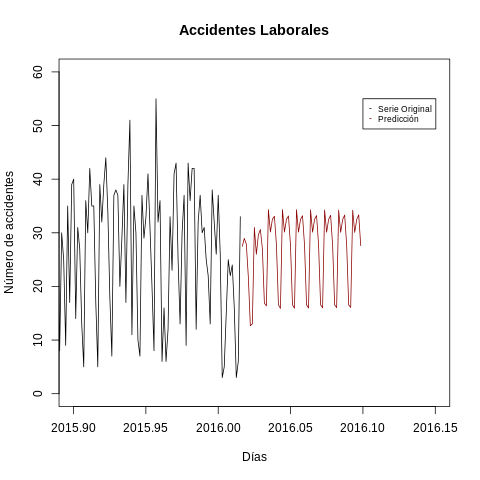

In [ ]:
%%R
pd<-predict(arima(serie,order = c(7,0,21),method = 'ML'),n.ahead=60)$pred
plot(serie,main='Accidentes Laborales',  xlim=c(2015.9,2016.15),ylim=c(0,60),xlab='Días',ylab='Número de accidentes')
lines(pd,col='darkred') #Modelo original ARIMA(7,0,21)
legend(x=2016.1, y=55, legend=c('Serie Original', 'Predicción'),col=c('black','darkred'), pch='-',  cex= 0.7,  xpd = T )

In [ ]:
%R mean(pd)

array([26.82132394])

In [ ]:
%R mean(serie)

array([27.26466576])

En los próximos 2 meses se espera un total de 1610 accidentes. Si consideramos que se mantendrán la tendencia de lesiones que se ha presentado en los últimos 2 años, se sabe que:





Text(0, 0.5, 'Frecuencia')

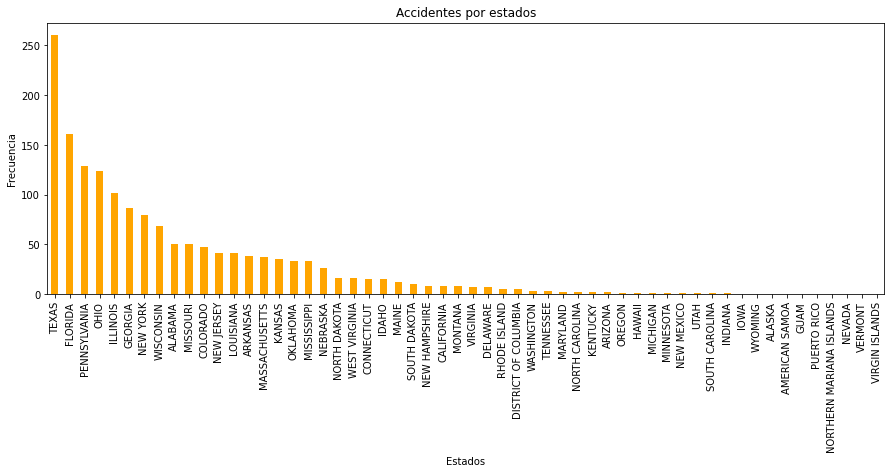

In [ ]:
#Cantidad de accidentes por estado
acum=(datos['State'].value_counts()/sum(datos['State'].value_counts()))*1610
plt.figure(figsize=(15,5))   #(ancho,altura) de la gráfica
acum.plot.bar(color='orange')
plt.title('Accidentes por estados')   #Nombre de la gráfica
xlabel('Estados')
ylabel('Frecuencia')

([<matplotlib.patches.Wedge at 0x7fb1244da2d0>,
 [Text(0.5938059822649293, 1.0427820747531014, 'TEXAS'),
  Text(-1.0207919367937055, 0.4098582947519252, 'FLORIDA'),
  Text(-0.7719121739049766, -0.7836782476101358, 'PENNSYLVANIA'),
  Text(0.26687467070234816, -1.067135375731455, 'OHIO'),
  Text(1.0079267453015857, -0.4405492890764356, 'ILLINOIS')])

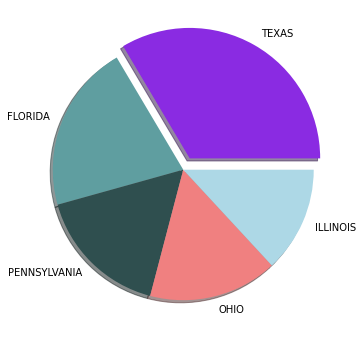

In [ ]:
#TOP 5 accidentes por estado
plt.figure(figsize=(6,6))   #(ancho,altura) de la gráfica
myl=['TEXAS','FLORIDA','PENNSYLVANIA','OHIO','ILLINOIS']
myc=['#8A2BE2','#5F9EA0','#2F4F4F','#F08080','#ADD8E6']
myexplode = [0.1, 0, 0, 0,0]
plt.pie(datos['State'].value_counts().head(5),labels=myl,colors=myc,explode=myexplode, shadow=True)

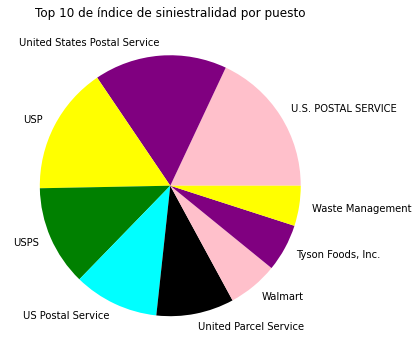

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))   #(ancho,altura) de la gráfica
nom = ['U.S. POSTAL SERVICE', 'United States Postal Service', 'USP', 'USPS', 'US Postal Service','United Parcel Service', 'Walmart', 'Tyson Foods, Inc.', 'Waste Management' ]

plt.pie(datos['Employer'].value_counts()[1:10], labels=nom, colors=['pink', 'purple', 'yellow', 'green', 'cyan', 'black'])
plt.title('Top 10 de índice de siniestralidad por puesto')

plt.show()


#Conclusión

Nuestro objetivo principal era predecir el comportamiento de la frecuencia de lesiones en cada uno de los estados definiendo el grado de urgencia más común. Dado el análisis identificamos que se espera, en promedio, que la frecuencia de accidentes continue de forma similar a como se ha observado desde que se tienen registros, con un promedio de 27 accidentes diarios. Además, más de la mitad de las lesiones presentadas son fracturas, seguidas de amputaciones, dolor y cortaduras ocurridas principalmente en dedos y manos.

En adición a esto, identificamos que el estado de Texas es el que mayor porcentaje de accidentes tiene en comparación con el resto de los estados, seguido por Florida y Pensilvania. Pues solo en estos 3 estados se presentan casi el 35% de los casos de los accidentes totales registrados.

Para nuestro objetivo secundario, el cual pretende calcular el índice de siniestralidad anual de cada uno de los puestos, distinguimos que los empleados con mayor riesgo de lesión eran aquellos que trabajaban en envió y paquetería de servicios postales.

####Trabajo a futuro:
En nuestro proyecto, el análisis de los datos era para ayudar a una aseguradora para determinar los costos de las primas. Si realizáramos una investigación acerca de los gastos derivados de los accidentes, podríamos determinar el promedio de gastos por accidente, el máximo y el mínimo de los montos a pagar; esto además de ayudar con el cálculo de la reserva técnica, ayudaría a establecer los deducibles de ciertos tipos de seguros.



